In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from gensim.models import Word2Vec 
from sklearn.model_selection import train_test_split
from random import sample
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import dataset
dataframe = pd.read_csv("/content/drive/MyDrive/ML Project/Reviews.csv", engine='python')

In [4]:
dataframe

Id  ...                                               Text
0            1  ...  I have bought several of the Vitality canned d...
1            2  ...  Product arrived labeled as Jumbo Salted Peanut...
2            3  ...  This is a confection that has been around a fe...
3            4  ...  If you are looking for the secret ingredient i...
4            5  ...  Great taffy at a great price.  There was a wid...
...        ...  ...                                                ...
568449  568450  ...  Great for sesame chicken..this is a good if no...
568450  568451  ...  I'm disappointed with the flavor. The chocolat...
568451  568452  ...  These stars are small, so you can give 10-15 o...
568452  568453  ...  These are the BEST treats for training and rew...
568453  568454  ...  I am very satisfied ,product is as advertised,...

[568454 rows x 10 columns]

In [5]:
dataframe.shape

(568454, 10)

In [6]:
# drop duplicate rows
data1 = dataframe.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first')

# drop rows that do not meet the condition
data1 = data1[data1['HelpfulnessNumerator'] <= data1['HelpfulnessDenominator']]

data1.shape

(393931, 10)

In [7]:
# count score values
data1['Score'].value_counts()

5    250961
4     56093
1     36306
3     29769
2     20802
Name: Score, dtype: int64

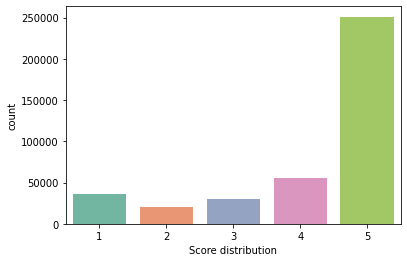

In [8]:
#sns.countplot('Score',data = data1)
#plt.title("Score distribution")

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.countplot(x='Score', data=data1, palette='Set2')
plt.xlabel('Score distribution')
plt.show()

In [9]:
# Randomely select 20000 samples from each'Score' 1,2,4,5 
S1 = data1[data1['Score'] ==1].sample(n=2500,random_state=0)
S2 = data1[data1['Score'] ==2].sample(n=2500,random_state=0)
S4 = data1[data1['Score'] ==4].sample(n=2500,random_state=0)
S5 = data1[data1['Score'] ==5].sample(n=2500,random_state=0)
data2 = pd.concat([S1,S2,S4,S5])
data2.shape

(10000, 10)

Text(0.5, 1.0, 'Score distribution')

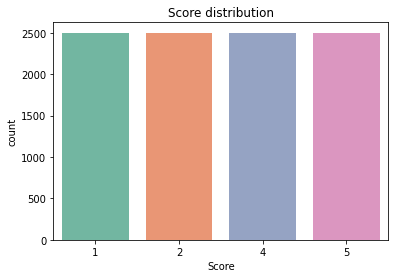

In [10]:
sns.countplot('Score',data = data2,palette='Set2')
plt.title("Score distribution")

In [11]:
# Identifing missing Values
miss_val = data2.isna().sum()
miss_val

Id                        0
ProductId                 0
UserId                    0
ProfileName               1
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [12]:
# Converting Score values into class label either Posituve or Negative.
def partition(x):
    if x < 3:
        return 0
    else:
        return 1

data3 = data2.reset_index(drop=True)
actual_score = data3['Score']
label = actual_score.map(partition)
data3['Label']=label

In [15]:
# Modify score range from (1,5) to (1,4)
data4 = data3.iloc[:,:]
Score = [1]*2500 + [2]*2500 + [3]*2500 +[4]*2500
data4['Score'] = Score
data4

Id  ... Label
0     318929  ...     0
1     133502  ...     0
2      99571  ...     0
3     519816  ...     0
4     384447  ...     0
...      ...  ...   ...
9995  150415  ...     1
9996   45474  ...     1
9997   13830  ...     1
9998  221333  ...     1
9999  450704  ...     1

[10000 rows x 11 columns]

In [16]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import matplotlib.pyplot as plt

In [17]:
def create_Word_Corpus(temp):
    words_corpus = ''
    for val in temp["Summary"]:
        text = str(val).lower()
        #text = text.translate(trantab)
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        for words in tokens:
            words_corpus = words_corpus + words + ' '
    return words_corpus

In [20]:
import nltk
nltk.download('punkt')

pos_wordcloud = WordCloud(width=900, height=500, background_color="white").generate(create_Word_Corpus(data3[5000:]))
neg_wordcloud = WordCloud(width=900, height=500, background_color="white").generate(create_Word_Corpus(data3[:5000]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
wordcloud_1 = WordCloud(width=900, height=500, background_color="white").generate(create_Word_Corpus(data3[:2500]))
wordcloud_2 = WordCloud(width=900, height=500, background_color="white").generate(create_Word_Corpus(data3[2500:5000]))
wordcloud_4 = WordCloud(width=900, height=500, background_color="white").generate(create_Word_Corpus(data3[5000:7500]))
wordcloud_5 = WordCloud(width=900, height=500, background_color="white").generate(create_Word_Corpus(data3[7500:10000]))

In [22]:
# Plot cloud
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='white')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

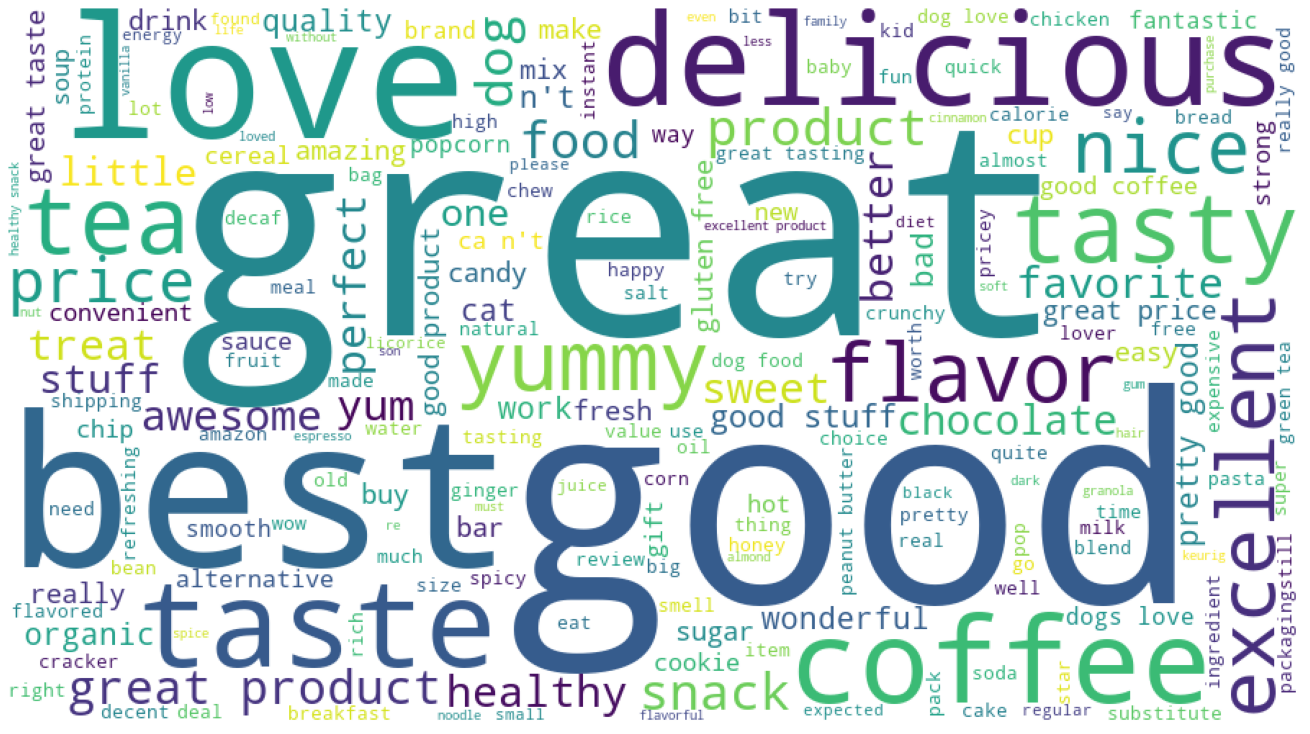

In [23]:
plot_Cloud(pos_wordcloud)

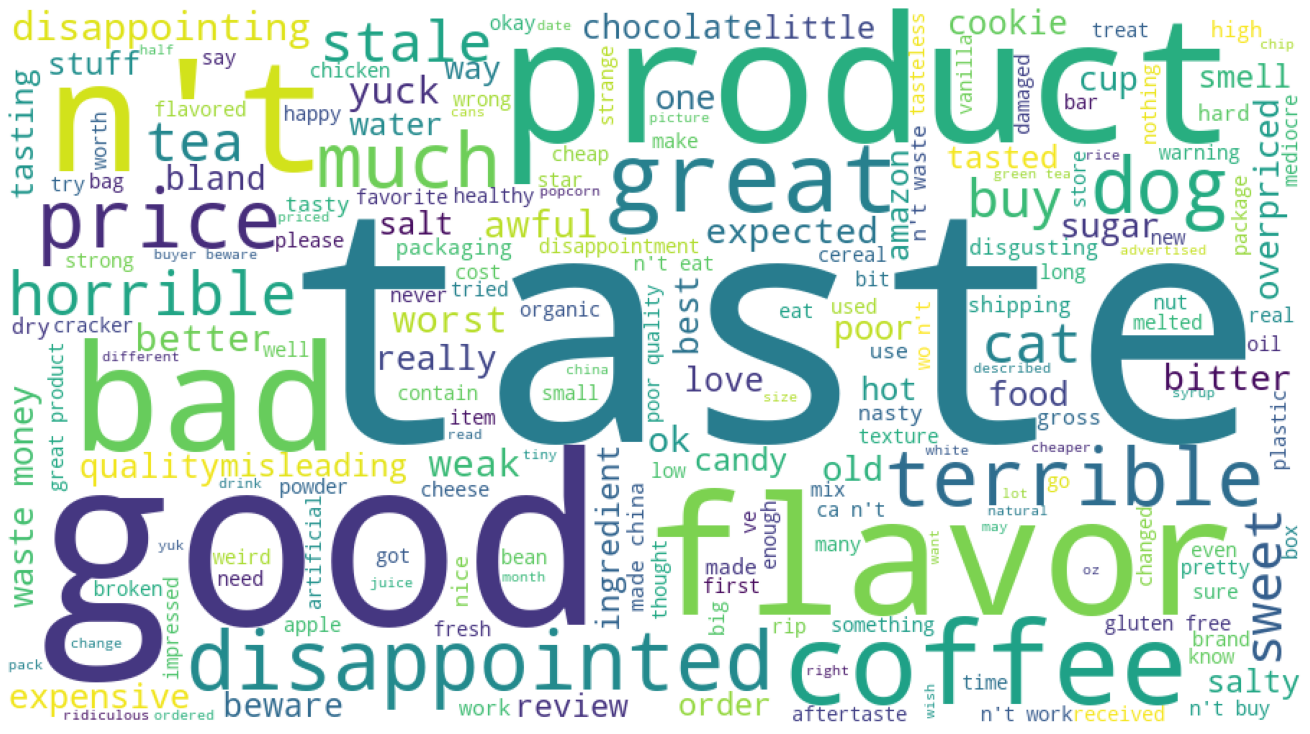

In [24]:
plot_Cloud(neg_wordcloud)

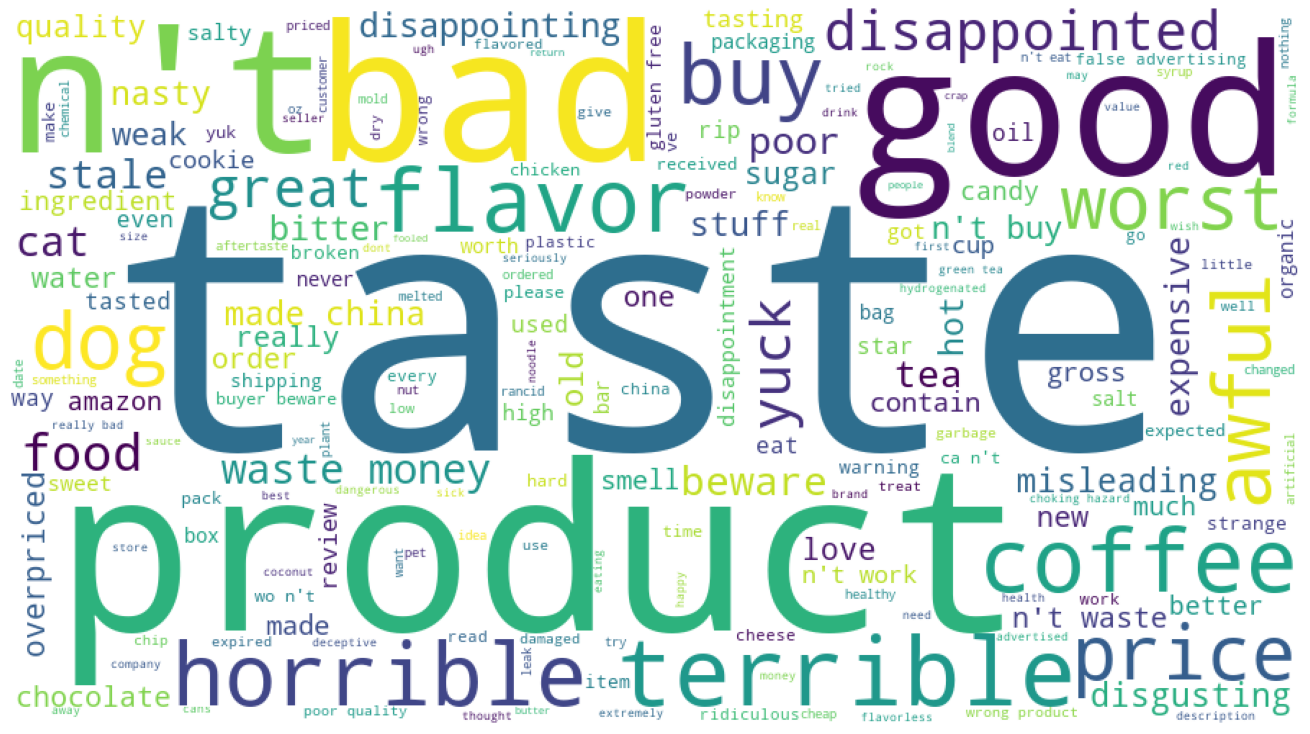

In [25]:
plot_Cloud(wordcloud_1) ####

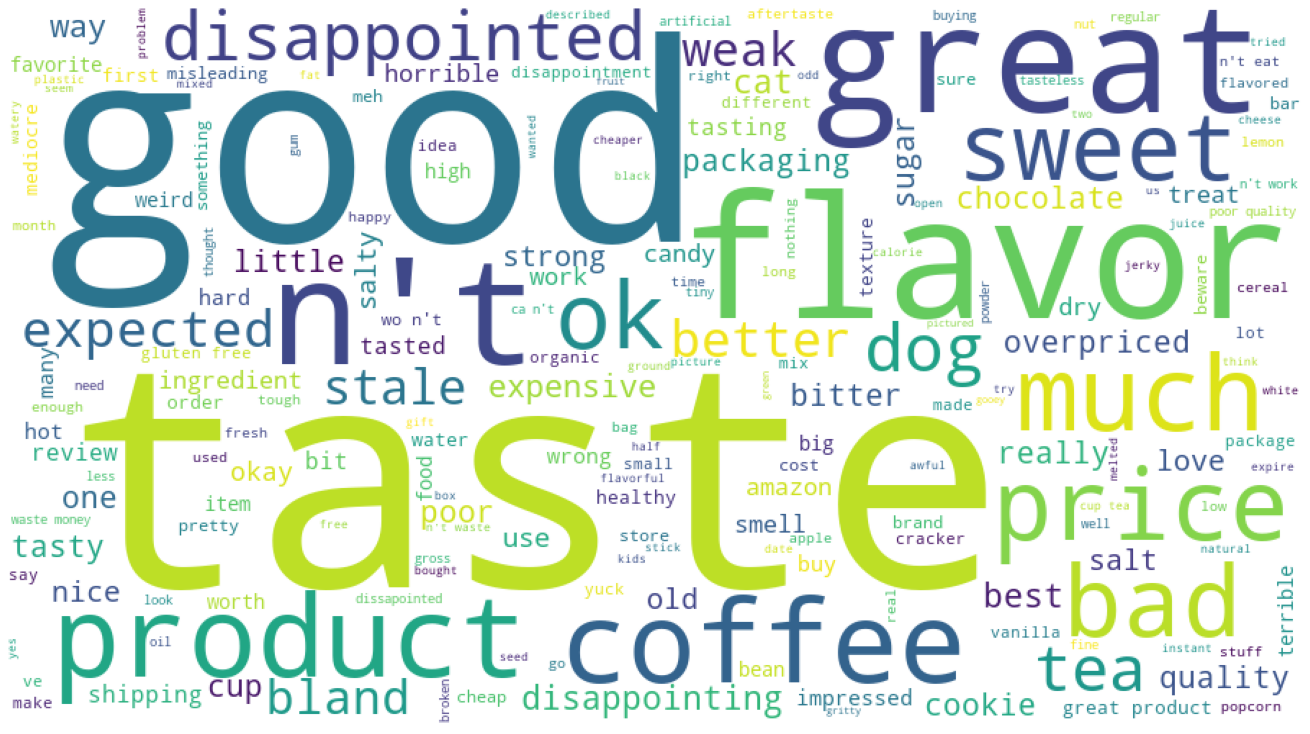

In [26]:
plot_Cloud(wordcloud_2)

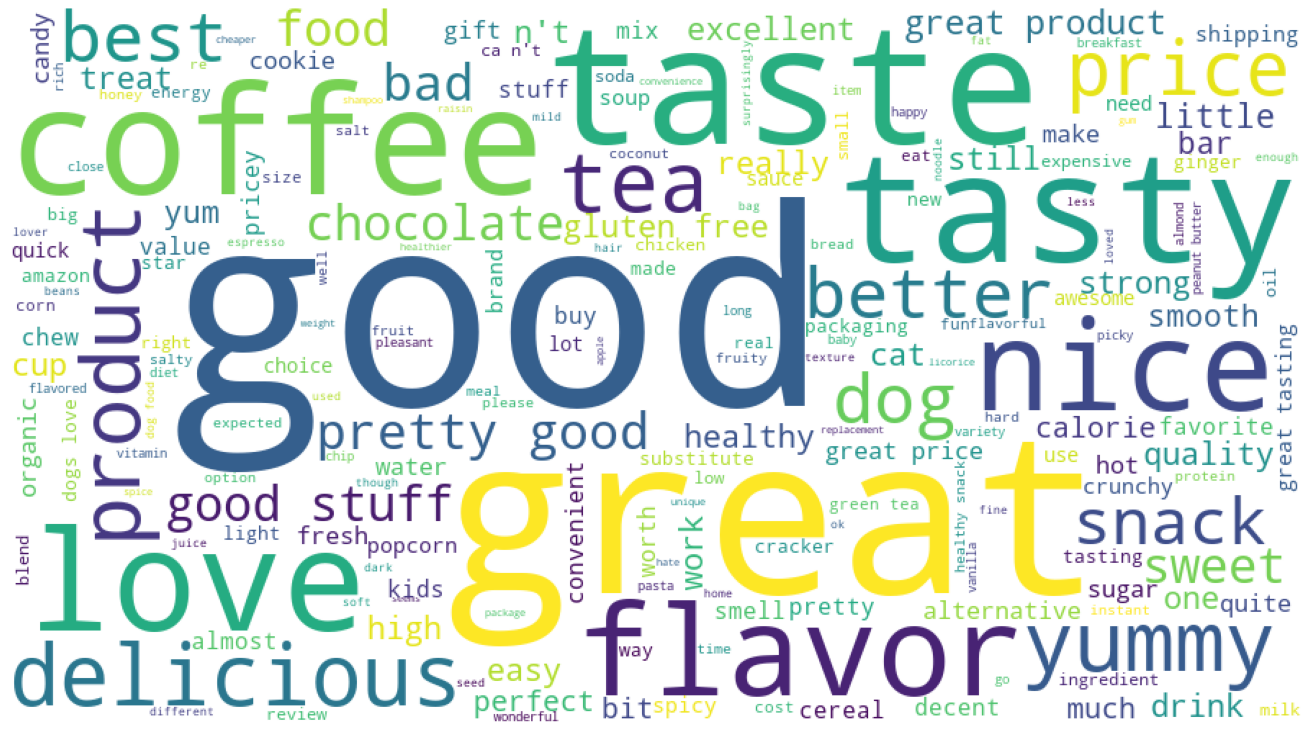

In [27]:
plot_Cloud(wordcloud_4)

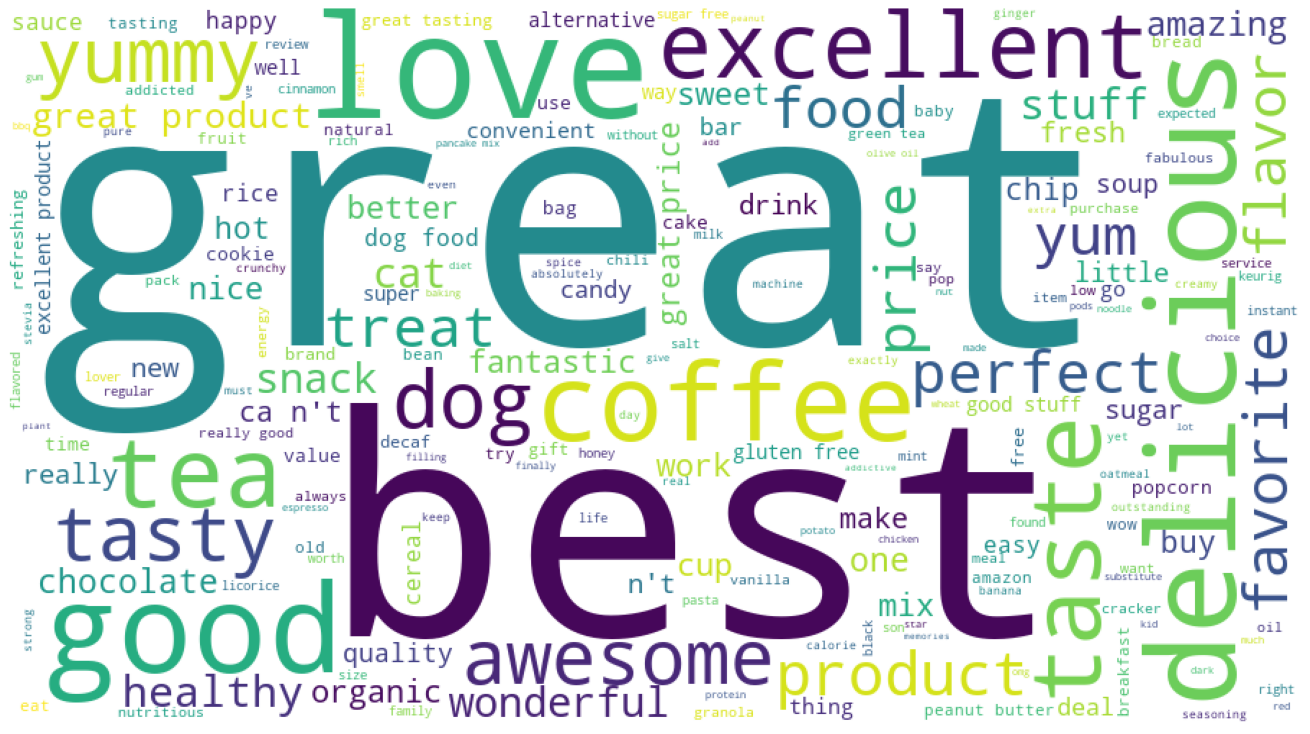

In [28]:
plot_Cloud(wordcloud_5) ####

In [29]:
data5 = data4.iloc[:,:]

data5["Usefulness"] = (data5["HelpfulnessNumerator"]/data5["HelpfulnessDenominator"]).apply(lambda n: ">75%" if n > 0.75 
                                                                                          else ("<25%" if n < 0.25 
                                                                                                  else ("25-75%" if n >= 0.25 and n <= 0.75 
                                                                                                        else "useless")))


data5.loc[data5.HelpfulnessDenominator == 0, 'Usefulness'] = "useless"
data5


Id   ProductId  ... Label Usefulness
0     318929  B006OSAH28  ...     0     25-75%
1     133502  B002YP8556  ...     0       >75%
2      99571  B000ILIHA6  ...     0     25-75%
3     519816  B000FZ0TCE  ...     0     25-75%
4     384447  B000YPH8CE  ...     0    useless
...      ...         ...  ...   ...        ...
9995  150415  B001EQ596O  ...     1       >75%
9996   45474  B000LKVHOW  ...     1    useless
9997   13830  B004WJUXCK  ...     1    useless
9998  221333  B000B7PNI6  ...     1       >75%
9999  450704  B005TY2F3W  ...     1       >75%

[10000 rows x 12 columns]

In [30]:
# save the dataframe as a csv file
data5.to_csv("data5.csv")

In [31]:
data5.Usefulness.value_counts()

useless    4046
>75%       3251
25-75%     1636
<25%       1067
Name: Usefulness, dtype: int64

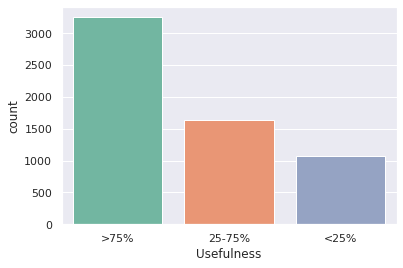

In [32]:
# useful reviews are commom
sns.set()
sns.countplot(x='Usefulness', order=[ '>75%', '25-75%', '<25%'], data=data5, palette='Set2')
plt.xlabel('Usefulness')
plt.show()

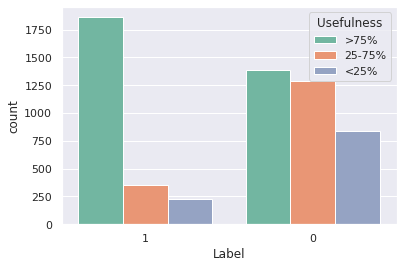

In [33]:
# nagetive reviews are more helpful

sns.set()
sns.countplot(x='Label', hue='Usefulness', order=[1, 0], \
              hue_order=['>75%', '25-75%', '<25%'], data=data5, palette="Set2")
plt.xlabel('Label')
plt.show()

In [34]:
# Word Count
data5["text_word_count"] = data5["Text"].apply(lambda text: len(text.split()))

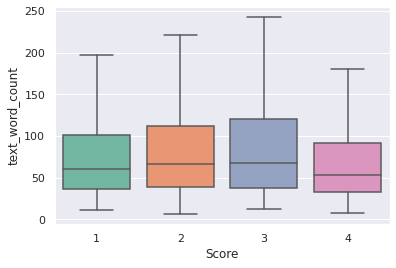

In [35]:
# Positive reviews (Score 4) are shorter.

sns.boxplot(x='Score',y='text_word_count', data=data5
, palette='Set2', showfliers=False)
plt.show()

Text(0.5, 1.0, 'Word count histogram')

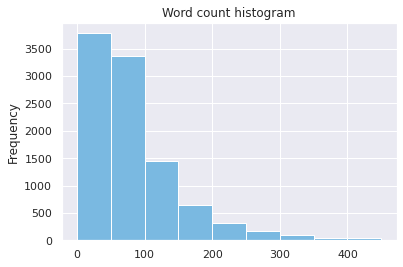

In [36]:
#Word count histogram
bins_list = [50*x for x in range(0,10)]

data5.Text.apply(lambda x:len(x.split(' '))).plot(kind='hist',bins = bins_list,color='#7AB9E1')
plt.title('Word count histogram')

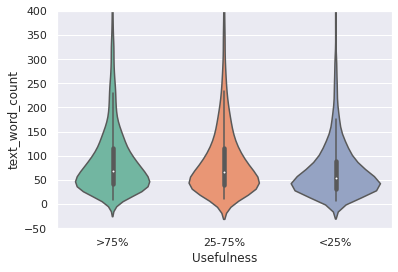

In [37]:
# How does word count relate to helpfulness?
sns.violinplot(x='Usefulness', y='text_word_count', order=['>75%', '25-75%', '<25%'], \
               data=data5, palette='Set2')
plt.ylim(-50, 400)
plt.show()

#